In [1]:
!pip install tensorflow_text tensorflow tensorflow-hub --quiet

In [9]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import re

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
uploaded = files.upload()

Saving final_extended_dataset_filtered.csv to final_extended_dataset_filtered (1).csv


In [12]:
for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]), nrows=20000)
    break

In [20]:
print(df.columns)
df.columns = df.columns.str.strip().str.lower()

Index(['Category', 'Subcategory', 'Type', 'Item_Name', 'Item_Variant',
       'Sales_Type', 'Source', 'Sales_Count', 'Revenue'],
      dtype='object')


In [25]:
df = df.drop_duplicates()
df.columns = df.columns.str.strip().str.lower()
df = df[['category',
         'subcategory',
         'type',
         'item_name',
         'item_variant',
         'sales_type',
         'source',
         'sales_count',
         'revenue']]

In [26]:
df = df.dropna()
df = df.astype(str)
df = df.applymap(lambda x: x.lower())

<ipython-input-26-58cb3fb6e577>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower())


In [27]:
df['text'] = (
    df['item_name'] + ' ' +
    df['item_variant'] + ' ' +
    df['category'] + ' ' +
    df['subcategory']
)

In [28]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])

In [29]:
k = 10  # Number of clusters (can be tuned)
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [30]:
for i in range(k):
    print(f"\n--- Cluster {i} ---")
    print(df[df['cluster'] == i]['item_name'].head(5).to_string(index=False))


--- Cluster 0 ---
   beef floss
cheese banana
cheese banana
    choco bun
   coffee bun

--- Cluster 1 ---
   beef cordon bleu
   beef cordon bleu
   beef cordon bleu
chicken cordon bleu
chicken cordon bleu

--- Cluster 2 ---
americano (hot)
americano (hot)
americano (hot)
     cappuccino
     cappuccino

--- Cluster 3 ---
              aglio olio
              aglio olio
              aglio olio
amali sirloin fettuccine
amali sirloin fettuccine

--- Cluster 4 ---
 caramel latte
 caramel latte
  coffee latte
  coffee latte
hot aren latte

--- Cluster 5 ---
3 risoles mayo
3 risoles mayo
3 risoles mayo
3 risoles mayo
3 risoles mayo

--- Cluster 6 ---
    bubble gum milk cream
    bubble gum milk cream
pasta mushroom stroganoff
pasta mushroom stroganoff
       chicken cream soup

--- Cluster 7 ---
iced double choco cream
iced double choco cream
           choco banana
           choco banana
  cashew velvet cookies

--- Cluster 8 ---
               dori sambal matah
               dori s

In [32]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(X.toarray())

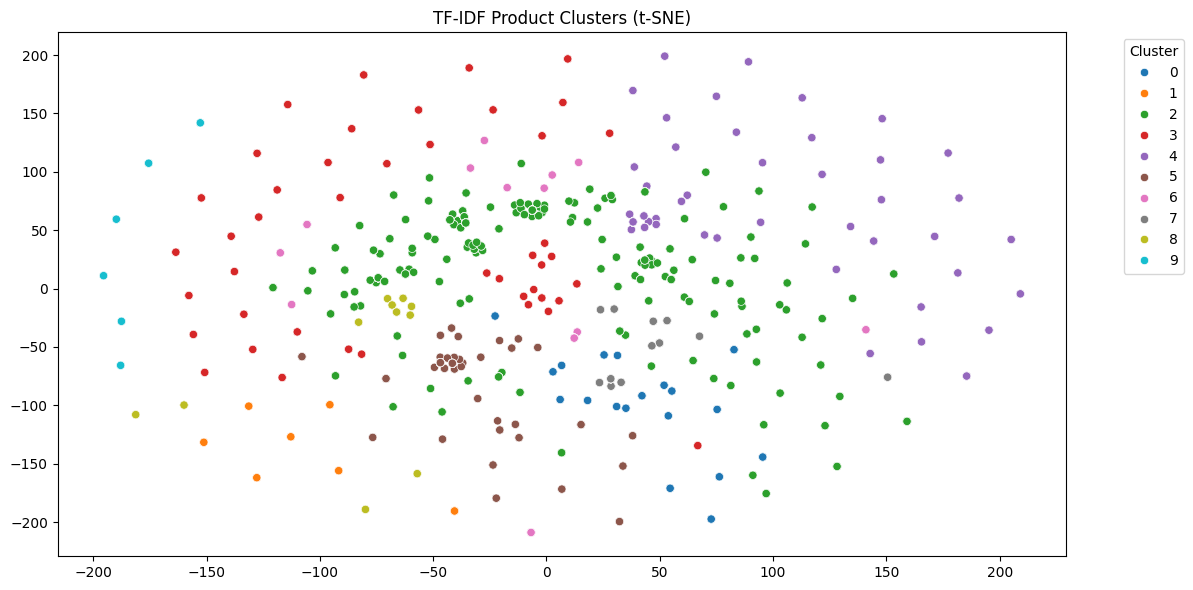

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['cluster'], palette='tab10')
plt.title("TF-IDF Product Clusters (t-SNE)")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()